In [3]:
import pandas as pd
import numpy as np
import sys
import time

sys.path.append('../../../')
from utils import modelling as mod
from utils import utils
from utils import paths
import wandb

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [4]:
# df = pd.read_csv('/Users/tudor/Documents/phd/coding/project_CF/data/final_df_aberdeen.csv')
df = pd.read_csv('/gws/nopw/j04/ai4er/users/ts809/era5_final/final_df_aberdeen.csv')    # JASMIN

weights = mod.CalcClassWeights(df['floods'])
df_to_analyse = df.drop(columns=['Unnamed: 0.1', 'time', 'Unnamed: 0', 'floods', 'time_ok', 't'])

X = df_to_analyse.drop(columns=['floods_x4'])
y = df_to_analyse['floods_x4']

X_train = X.iloc[0:int(len(X) *.8)] 
X_test = X.iloc[int(len(X) *.8):int(len(X) *.9)]
X_val = X.iloc[int(len(X) *.9):]

y_train = y.iloc[0:int(len(y) *.8)]
y_test = y.iloc[int(len(y) *.8):int(len(y) *.9)]
y_val = y.iloc[int(len(y) *.9):]

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [18]:
randfor = RandomForestClassifier(
    bootstrap=True,
    n_estimators=2000,
    criterion='gini',
    max_features='log2',
    max_depth=None,
    min_samples_split = 50,
    min_samples_leaf=20,
    random_state=42,
    class_weight=weights,
    verbose =1,
)

In [19]:
randfor.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   15.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   59.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:  3.9min
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:  6.2min
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  8.9min


RandomForestClassifier(class_weight={0: np.float64(0.0001969178082191781),
                                     1: np.float64(0.9998030821917808)},
                       max_features='log2', min_samples_leaf=20,
                       min_samples_split=50, n_estimators=2000, random_state=42,
                       verbose=1)

In [20]:
y_pred = randfor.predict(X_test)
y_prob = randfor.predict_log_proba(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
/home/users/ts809/miniconda3/envs/project_CF/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:994: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


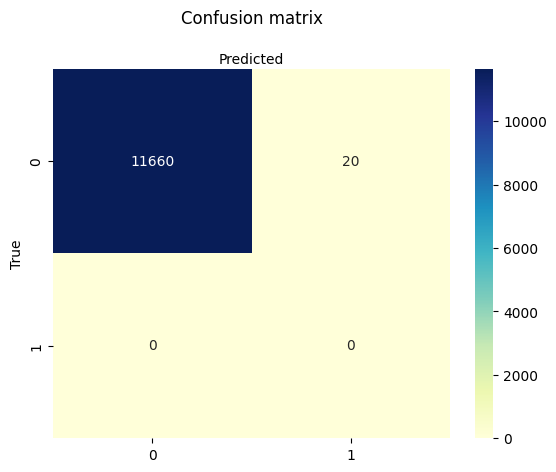

In [21]:
confusionMatrix(y_pred, y_test)

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def confusionMatrix(y_tested,y_predicted):
    cnf_matrix = confusion_matrix(y_tested, y_predicted)

    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('True')
    plt.xlabel('Predicted')